In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,recall_score,precision_score,roc_curve,accuracy_score,mean_squared_error,f1_score,confusion_matrix

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
cd D:\FINGERTIPS DATA SCIENCE\READING MATERIALS\PROJECTS\PYTHON_ML\PROJECT-4  Python Logistics Regression Titanic Survival

D:\FINGERTIPS DATA SCIENCE\READING MATERIALS\PROJECTS\PYTHON_ML\PROJECT-4 Python Logistics Regression Titanic Survival


In [4]:
df=pd.read_csv("Python_Project_4_Python_Logistic_Titanic_Survival.csv") 

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Part-1: Data Exploration and Pre-processing

In [6]:
# 1) load the given dataset
df=pd.read_csv("Python_Project_4_Python_Logistic_Titanic_Survival.csv") 

In [7]:
# 2) print all the column names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
# 3) describe the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
# 4) check the null value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
# 5) if there are Null values, Handle these
df.Age.unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [20]:
df["Age"]=df["Age"].fillna(df['Age'].mean())

In [21]:
df.Age.unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [22]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [23]:
df["Cabin"] = df["Cabin"].fillna(df["Cabin"].mode()[0])

In [24]:
df["Cabin"].unique()

array(['B96 B98', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [25]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [26]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [27]:
df=df.dropna()

In [28]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [29]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
L_data =LabelEncoder() 

In [32]:
df[["Name","Cabin","Sex","Embarked","Ticket"]]=df[["Name","Cabin","Sex","Embarked","Ticket"]].apply(L_data.fit_transform)

In [33]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.000000,1,0,522,7.2500,46,2
1,2,1,1,190,0,38.000000,1,0,595,71.2833,80,0
2,3,1,3,353,0,26.000000,0,0,668,7.9250,46,2
3,4,1,1,272,0,35.000000,1,0,48,53.1000,54,2
4,5,0,3,15,1,35.000000,0,0,471,8.0500,46,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,547,1,27.000000,0,0,100,13.0000,46,2
887,888,1,1,303,0,19.000000,0,0,14,30.0000,29,2
888,889,0,3,412,0,29.699118,1,2,674,23.4500,46,2
889,890,1,1,81,1,26.000000,0,0,8,30.0000,59,0


In [34]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Part-2: Working with Models


In [35]:
# 1) Create the target data and feature data where target data is survived
x=df.drop(['Survived'],axis=1)
y=df["Survived"]

In [36]:
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,108,1,22.000000,1,0,522,7.2500,46,2
1,2,1,190,0,38.000000,1,0,595,71.2833,80,0
2,3,3,353,0,26.000000,0,0,668,7.9250,46,2
3,4,1,272,0,35.000000,1,0,48,53.1000,54,2
4,5,3,15,1,35.000000,0,0,471,8.0500,46,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,547,1,27.000000,0,0,100,13.0000,46,2
887,888,1,303,0,19.000000,0,0,14,30.0000,29,2
888,889,3,412,0,29.699118,1,2,674,23.4500,46,2
889,890,1,81,1,26.000000,0,0,8,30.0000,59,0


In [37]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [38]:
# 2) Split the data into Training and testing Set
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=10)

In [40]:
x_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
57,58,3,594,1,28.500000,0,0,214,7.2292,46,0
717,718,2,820,0,27.000000,0,0,292,10.5000,115,2
822,823,1,677,1,38.000000,0,0,96,0.0000,46,2
397,398,2,523,1,46.000000,0,0,225,26.0000,46,2
164,165,3,627,1,1.000000,4,1,248,39.6875,46,2
...,...,...,...,...,...,...,...,...,...,...,...
370,371,1,328,1,25.000000,1,0,57,55.4417,130,0
321,322,3,200,1,27.000000,0,0,364,7.8958,46,2
528,529,3,724,1,39.000000,0,0,249,7.9250,46,2
126,127,3,524,1,29.699118,0,0,462,7.7500,46,1


In [41]:
x_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
635,636,2,206,0,28.000000,0,0,129,13.0000,46,2
647,648,1,746,1,56.000000,0,0,68,35.5000,7,0
566,567,3,784,1,19.000000,0,0,351,7.8958,46,2
195,196,1,494,0,58.000000,0,0,585,146.5208,42,0
731,732,3,346,1,11.000000,0,0,215,18.7875,46,0
...,...,...,...,...,...,...,...,...,...,...,...
667,668,3,698,1,29.699118,0,0,255,7.7750,46,2
191,192,2,136,1,19.000000,0,0,226,13.0000,46,2
441,442,3,323,1,20.000000,0,0,304,9.5000,46,2
95,96,3,739,1,29.699118,0,0,474,8.0500,46,2


In [42]:
y_train

57     0
717    1
822    0
397    0
164    0
      ..
370    1
321    0
528    0
126    0
266    0
Name: Survived, Length: 711, dtype: int64

In [43]:
y_test

635    1
647    1
566    0
195    1
731    0
      ..
667    0
191    0
441    0
95     0
234    0
Name: Survived, Length: 178, dtype: int64

In [44]:
# 3) Create a Logistic regression model for Target and feature data
from sklearn.linear_model import LogisticRegression

In [45]:
model=LogisticRegression()

In [46]:
model.fit(x_train,y_train)

LogisticRegression()

In [47]:
model.score(x_train,y_train)

0.7805907172995781

In [48]:
model.score(x_test,y_test)

0.8202247191011236

In [49]:
y_predicted=model.predict(x_test)
y_predicted

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)

In [50]:
y_test

635    1
647    1
566    0
195    1
731    0
      ..
667    0
191    0
441    0
95     0
234    0
Name: Survived, Length: 178, dtype: int64

In [53]:
# 4) Display the Confusion Matrix
cnf_matrix=metrics.confusion_matrix(y_test,y_predicted)

In [54]:
cnf_matrix

array([[102,  13],
       [ 19,  44]], dtype=int64)

In [55]:
# 5) Find the Accuracy Score
Accuracy_Score=accuracy_score(y_test, y_predicted)
Accuracy_Score

0.8202247191011236

In [56]:
# 6) Find the Precision Score
Precision_Score=precision_score(y_test, y_predicted)
Precision_Score

0.7719298245614035

In [57]:
# 7) Find the Recall Score
Recall_Score=recall_score(y_test, y_predicted)
Recall_Score

0.6984126984126984

In [58]:
# 8) Find the F1 Score
F1_Score=f1_score(y_test,y_predicted)
F1_Score

0.7333333333333333

In [59]:
# 9) Find the probability of testing data
test_proba=model.predict_proba(x_test)
test_proba

array([[0.33561742, 0.66438258],
       [0.83061948, 0.16938052],
       [0.83750229, 0.16249771],
       [0.23558697, 0.76441303],
       [0.74849282, 0.25150718],
       [0.81062095, 0.18937905],
       [0.36207876, 0.63792124],
       [0.26698656, 0.73301344],
       [0.83208204, 0.16791796],
       [0.86744611, 0.13255389],
       [0.74201415, 0.25798585],
       [0.27887243, 0.72112757],
       [0.93157156, 0.06842844],
       [0.8668979 , 0.1331021 ],
       [0.76519891, 0.23480109],
       [0.87556009, 0.12443991],
       [0.18677446, 0.81322554],
       [0.87672619, 0.12327381],
       [0.86358281, 0.13641719],
       [0.4295981 , 0.5704019 ],
       [0.89074119, 0.10925881],
       [0.77458062, 0.22541938],
       [0.11520519, 0.88479481],
       [0.82401531, 0.17598469],
       [0.87235089, 0.12764911],
       [0.80783294, 0.19216706],
       [0.35626959, 0.64373041],
       [0.86478461, 0.13521539],
       [0.82278458, 0.17721542],
       [0.23585631, 0.76414369],
       [0.

In [60]:
Classification_report=classification_report(y_test,y_predicted)
print(Classification_report)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       115
           1       0.77      0.70      0.73        63

    accuracy                           0.82       178
   macro avg       0.81      0.79      0.80       178
weighted avg       0.82      0.82      0.82       178



In [ ]:
# 10) Display ROC Curve and find the AUC score

In [61]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

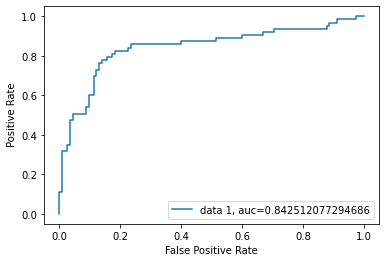

In [63]:
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, threshold = roc_curve(y_test,y_pred_proba)
auc = roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc=" +str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel(" Positive Rate")

plt.show()